In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
dataset = pd.read_csv("fraud_dataset.csv")

In [3]:
dataset.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0
5,1,1,2,1,1,5417,4196,267,360,1,0,1,1
6,1,1,0,0,1,2333,1516,95,360,1,1,1,1
7,1,1,3,1,1,3036,2504,158,360,0,1,2,1
8,1,1,2,1,1,4006,1526,168,360,1,1,1,1
9,1,1,1,1,1,12841,10968,349,360,1,0,2,1


<AxesSubplot:xlabel='Fraud_Risk', ylabel='count'>

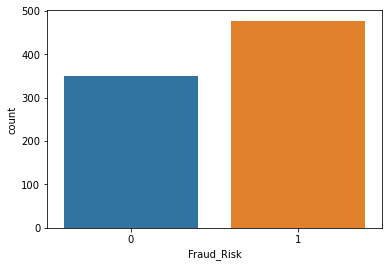

In [4]:
sns.countplot(x="Fraud_Risk",data=dataset)

<AxesSubplot:xlabel='Fraud_Risk', ylabel='count'>

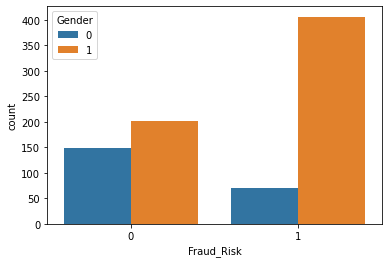

In [5]:
sns.countplot(x="Fraud_Risk",hue="Gender",data=dataset)

In [6]:
dataset.isnull()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,False,False,False,False,False,False,False,False,False,False,False,False,False
823,False,False,False,False,False,False,False,False,False,False,False,False,False
824,False,False,False,False,False,False,False,False,False,False,False,False,False
825,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
dataset.isnull().sum()

Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Term                   0
Credit_History_Available    0
Housing                     0
Locality                    0
Fraud_Risk                  0
dtype: int64

<AxesSubplot:>

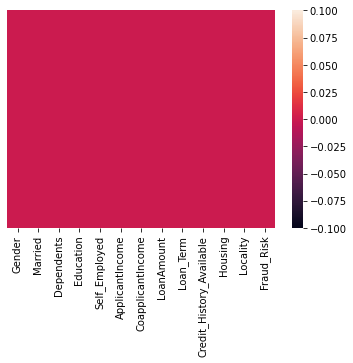

In [8]:
sns.heatmap(dataset.isnull(),yticklabels=False)

<AxesSubplot:xlabel='Fraud_Risk', ylabel='Gender'>

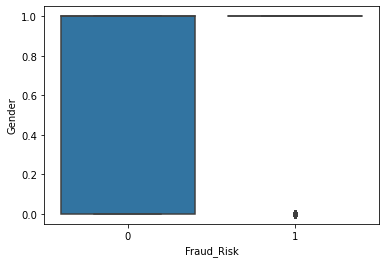

In [9]:
sns.boxplot(x="Fraud_Risk",y="Gender",data=dataset)

In [10]:
dataset.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1


In [11]:
# dataset.drop(['Gender','Married','Dependents','LoanAmount','Loan_Term','Locality'],axis=1,inplace=True)

In [12]:
dataset.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1


In [13]:
X = dataset.drop("Fraud_Risk",axis=1)
y = dataset["Fraud_Risk"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc=StandardScaler()
norm=MinMaxScaler()

In [17]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [29]:
x_train=norm.fit_transform(X_train)
x_test=norm.fit_transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression()

In [32]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [33]:
predictions = logmodel.predict(X_test)

In [34]:
from sklearn.metrics import classification_report

In [35]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.86      0.96      0.91       111\n           1       0.97      0.87      0.92       138\n\n    accuracy                           0.91       249\n   macro avg       0.91      0.92      0.91       249\nweighted avg       0.92      0.91      0.91       249\n'

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test,predictions)

array([[107,   4],
       [ 18, 120]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
df = accuracy_score(y_test,predictions)*100

In [40]:
display(df)

91.16465863453816

# Solving the problem with KNN

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# %matplotlib inline
import seaborn as sns

In [75]:
df = pd.read_csv("fraud_dataset.csv")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0


In [76]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc=StandardScaler()
norm=MinMaxScaler()

In [77]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [78]:
x_train=norm.fit_transform(X_train)
x_test=norm.fit_transform(X_test)

In [79]:
X = dataset.drop("Fraud_Risk",axis=1)
y = dataset["Fraud_Risk"]

In [80]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality
0,1,0,0,1,0,5849,0,146,360,1,1,1
1,1,1,1,1,1,4583,1508,128,360,1,1,3
2,1,1,0,1,1,3000,0,66,360,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
822,0,0,1,1,0,2872,1556,91,360,1,1,1
823,0,0,1,1,1,8596,0,162,360,1,1,2
824,1,0,1,1,1,3664,0,109,215,1,1,1
825,1,0,2,1,0,4921,0,162,360,0,1,2


In [81]:
y

0      0
1      1
2      1
3      1
4      0
      ..
822    0
823    0
824    0
825    0
826    0
Name: Fraud_Risk, Length: 827, dtype: int64

In [82]:
y.value_counts()

1    477
0    350
Name: Fraud_Risk, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy=[]
for i in range(1,60):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    accuracy.append(accuracy_score(y_test,pred_i)*100)

In [88]:
accuracy

[93.57429718875501,
 92.7710843373494,
 92.3694779116466,
 91.96787148594377,
 92.3694779116466,
 92.7710843373494,
 92.3694779116466,
 92.7710843373494,
 92.7710843373494,
 91.56626506024097,
 91.96787148594377,
 91.16465863453816,
 91.96787148594377,
 91.56626506024097,
 90.76305220883533,
 90.76305220883533,
 90.36144578313254,
 90.36144578313254,
 89.95983935742971,
 89.95983935742971,
 89.95983935742971,
 89.5582329317269,
 89.5582329317269,
 89.5582329317269,
 89.1566265060241,
 89.95983935742971,
 89.5582329317269,
 89.95983935742971,
 89.1566265060241,
 89.1566265060241,
 89.5582329317269,
 89.95983935742971,
 89.5582329317269,
 89.95983935742971,
 89.1566265060241,
 89.5582329317269,
 89.95983935742971,
 89.95983935742971,
 89.95983935742971,
 89.95983935742971,
 89.95983935742971,
 90.36144578313254,
 90.36144578313254,
 90.36144578313254,
 90.36144578313254,
 90.36144578313254,
 90.36144578313254,
 90.36144578313254,
 90.36144578313254,
 90.36144578313254,
 90.36144578313254

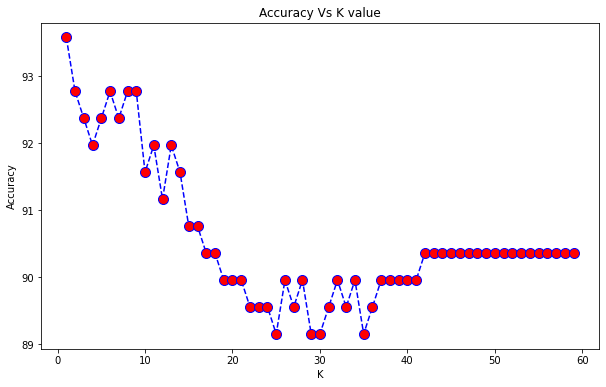

In [89]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),accuracy,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy Vs K value')
plt.xlabel('K')
plt.ylabel('Accuracy');

In [100]:
knn = KNeighborsClassifier(n_neighbors=1)

In [101]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [102]:
y_pred=knn.predict(x_test)

In [103]:
y_pred[:10]

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [104]:
np.array(y_test)[:10]

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [105]:
from sklearn.metrics import accuracy_score

In [107]:
accuracy_score(y_test,y_pred)*100

93.57429718875501